# Atividade B2 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import quad

## Interpolação de Lagrange

Valor estimado do polinômio em x = 1200 é 16078164328.950001


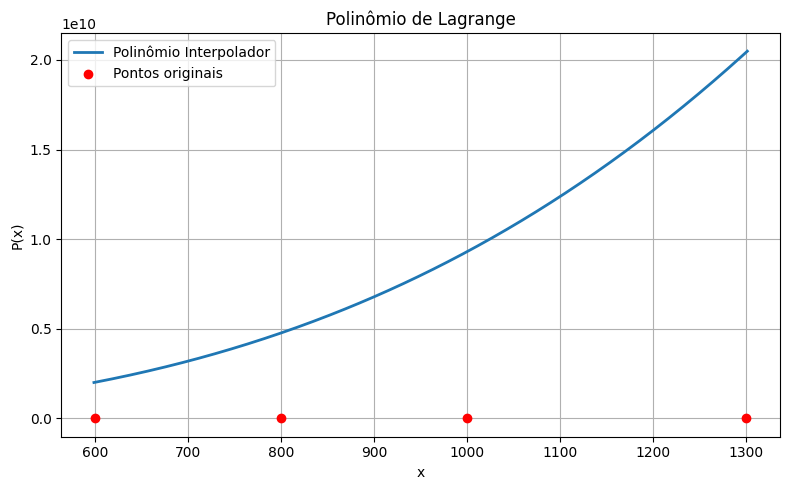

In [3]:
def interpolador_lagrange(x_vals, y_vals, x):
    num_pontos = len(x_vals)
    val = 0.0
    for i in range(num_pontos):
        termo_lagr = 1.0
        for j in range(num_pontos):
            if j != i:
                termo_lagr *= (x - x_vals[j] / (x_vals[i] - x_vals[j]))
        val += termo_lagr * y_vals[i]
    return val

def plotar_lagrange(x_vals, y_vals, titulo="Polinômio de Lagrange", salvar_imagem=True):
    x_intervalo = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 400)
    y_interp = [interpolador_lagrange(x_vals, y_vals, x) for x in x_intervalo]

    plt.figure(figsize=(8, 5))
    plt.plot(x_intervalo, y_interp, label="Polinômio Interpolador", linewidth=2)
    plt.scatter(x_vals, y_vals, color='red', label="Pontos originais", zorder=5)
    plt.title(titulo)
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


x_dados = [600, 800, 1000, 1300]
y_dados = [1.43, 2.55, 2.71, 2.61]
x_avaliar = 1200

resultado = interpolador_lagrange(x_dados, y_dados, x_avaliar)
print(f"Valor estimado do polinômio em x = {x_avaliar} é {resultado:.6f}")

plotar_lagrange(x_dados, y_dados)

## Interpolador de Newton

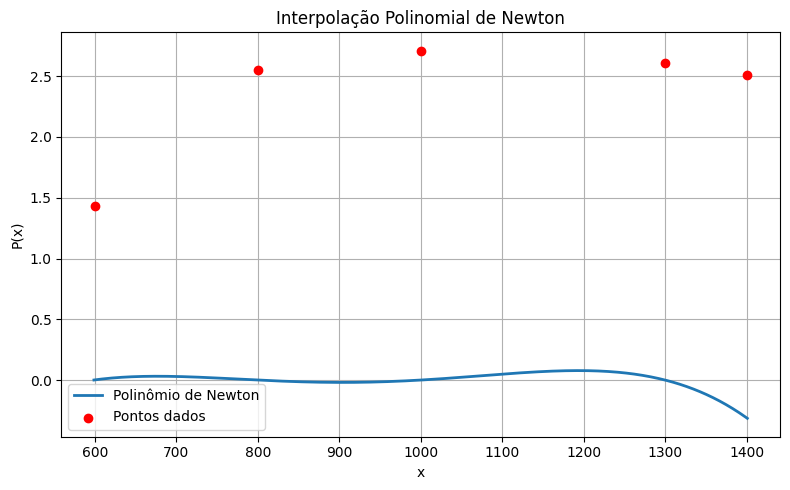

In [4]:
def diferencas_divididas(x, y):
    n = len(x)
    coef = y.copy()
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
    return coef

def polinomio_newton(x, coef, valor):
    n = len(coef)
    resultado = coef[-1]
    for i in range(n - 2, -1, -1):
        resultado = resultado * (valor - x[i] + coef[i])
    return resultado

x = [600, 800, 1000, 1300, 1400]
y = [1.43, 2.55, 2.71, 2.61, 2.51]

coef = diferencas_divididas(x, y)

x_plot = np.linspace(min(x) - 1, max(x) + 1, 400)
y_plot = [polinomio_newton(x, coef, xi) for xi in x_plot]

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, label='Polinômio de Newton', linewidth=2)
plt.scatter(x, y, color='red', zorder=5, label='Pontos dados')
plt.title('Interpolação Polinomial de Newton')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Soma de Riemann

Cálculo de Integrais por Soma de Riemann
----------------------------------------

Resultados:
Integral exata: 6.000000
Soma Inferior: 5.000000 | Erro: 1.000000
Soma Centrada: 6.000000 | Erro: 0.000000
Soma Superior: 7.000000 | Erro: 1.000000


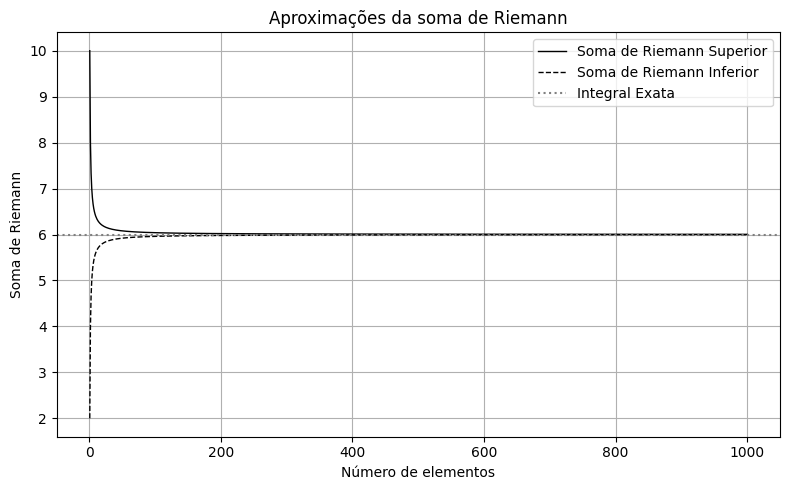

In [5]:
def f(x):
    return 2 * x + 1


def soma_riemann_inferior(f, a, b, n):
    dx = (b - a) / n
    soma = 0.0
    x_vals = []
    y_vals = []

    for i in range(n):
        x = a + i * dx
        soma += f(x)
        x_vals.append(x)
        y_vals.append(f(x))

    return soma * dx, x_vals, y_vals


def soma_riemann_superior(f, a, b, n):
    """Calcula a soma de Riemann pela direita"""
    dx = (b - a) / n
    soma = 0.0
    x_vals = []
    y_vals = []
    for i in range(1, n + 1):
        x = a + i * dx
        soma += f(x)
        x_vals.append(x)
        y_vals.append(f(x))
    return soma * dx, x_vals, y_vals


def soma_riemann_centrada(f, a, b, n):
    """Calcula a soma de Riemann pelo ponto médio"""
    dx = (b - a) / n
    soma = 0.0
    x_vals = []
    y_vals = []
    for i in range(n):
        x = a + (i + 0.5) * dx
        soma += f(x)
        x_vals.append(x)
        y_vals.append(f(x))
    return soma * dx, x_vals, y_vals


def plot_riemann(f, a, b, n, x_vals, y_vals, soma, integral_real, tipo, expr):
    """Plota a única aproximação de Riemann com preenchimento em azul claro"""
    dx = (b - a) / n
    x_full = np.linspace(a, b, 1000)
    y_full = f(x_full)
    erro = abs(integral_real - soma)

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot da função
    ax.plot(x_full, y_full, 'b-', linewidth=2, label=f'f(x) = {expr}')

    # Preenchimento sob a curva em azul claro
    ax.fill_between(x_full, y_full, color='lightblue', alpha=0.3)

    # Retângulos da soma de Riemann em azul claro com bordas
    for x, y in zip(x_vals, y_vals):
        ax.add_patch(
            Rectangle((x, 0), dx, y, color='lightblue', alpha=0.5, ec='blue'))

    # Linha da integral real
    ax.axhline(integral_real / (b - a), color='red',
               linestyle='--', label='Média da integral')

    # Configurações do gráfico
    ax.set_title(
        f'Soma de Riemann ({tipo}) - f(x) = {expr}\nAproximação: {soma:.4f} | Erro: {erro:.4f}')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)
    ax.legend()

    # Mostrar valores numéricos
    ax.text(0.02, 0.95, f'Integral exata: {integral_real:.4f}',
            transform=ax.transAxes, color='green')
    ax.text(0.02, 0.90, f'Aproximação: {soma:.4f}',
            transform=ax.transAxes, color='blue')
    ax.text(0.02, 0.85, f'Erro: {erro:.4f}',
            transform=ax.transAxes, color='red')

    plt.tight_layout()
    plt.savefig(f"{tipo.lower()}_riemann.png")  # Salva como imagem
    plt.close()  # Fecha a figura


def plot_comparativo(f, a, b, n, resultados, integral_real, expr):
    """Plota as três aproximações lado a lado para comparação"""
    tipos = ['Inferior', 'Centrada', 'Superior']
    cores = ['lightblue', 'lightgreen', 'lightcoral']

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    x_full = np.linspace(a, b, 1000)
    y_full = f(x_full)
    for i, (ax, (soma, x_vals, y_vals), tipo, cor) in enumerate(zip(axs, resultados, tipos, cores)):
        dx = (b - a) / n
        erro = abs(integral_real - soma)

        # Plot da função
        ax.plot(x_full, y_full, 'b-', linewidth=1.5)

        # Preenchimento sob a curva
        ax.fill_between(x_full, y_full, color=cor, alpha=0.2)

        # Retângulos da soma de Riemann
        for x, y in zip(x_vals, y_vals):
            ax.add_patch(Rectangle((x, 0), dx, y, color=cor, alpha=0.5, ec='black'))

        # Configurações do subplot
        ax.set_title(f'{tipo}\nAprox: {soma:.4f} | Erro: {erro:.4f}')
        ax.grid(True)

        if i == 0:
            ax.set_ylabel(f'f(x) = {expr}')

    fig.suptitle(f'Comparação dos Métodos de Riemann (n = {n})', y=1.02)
    plt.tight_layout()
    plt.savefig(f"{tipo.lower()}_riemann.png")  # Salva como imagem
    plt.close()  # Fecha a figura
    

def plot_convergencia(f, a, b, n_max, integral_real):
    ns = list(range(1, n_max + 1))
    soma_inf_vals = []
    soma_sup_vals = []

    for n in ns:
        soma_inf, _, _ = soma_riemann_inferior(f, a, b, n)
        soma_sup, _, _ = soma_riemann_superior(f, a, b, n)
        soma_inf_vals.append(soma_inf)
        soma_sup_vals.append(soma_sup)

    plt.figure(figsize=(8, 5))
    plt.plot(ns, soma_sup_vals, label="Soma de Riemann Superior", color='black', linewidth=1)
    plt.plot(ns, soma_inf_vals, label="Soma de Riemann Inferior", color='black', linestyle='dashed', linewidth=1)
    plt.axhline(integral_real, color='gray', linestyle=':', label="Integral Exata")
    plt.xlabel("Número de elementos")
    plt.ylabel("Soma de Riemann")
    plt.title("Aproximações da soma de Riemann")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("Cálculo de Integrais por Soma de Riemann")
    print("----------------------------------------")

    # Obter entrada do usuário
    a = float(input("\nInforme o limite inferior de integração (a): "))
    b = float(input("\nInforme o limite superior de integração (b): "))
    n = int(input("Informe o número de subintervalos (n): "))

    # Verificar validade dos parâmetros
    if b <= a:
        print("Erro: b deve ser maior que a. Usando a=0, b=2 como padrão.")
        a, b, n = 0, 2, 4

    expr = "2x + 1"

    # Calcular somas de Riemann
    soma_inf, x_inf, y_inf = soma_riemann_inferior(f, a, b, n)
    soma_sup, x_sup, y_sup = soma_riemann_superior(f, a, b, n)
    soma_med, x_med, y_med = soma_riemann_centrada(f, a, b, n)

    # Calcular integral real
    integral_real, _ = quad(f, a, b)

    # Mostrar resultados
    print("\nResultados:")
    print(f"Integral exata: {integral_real:.6f}")
    print(f"Soma Inferior: {soma_inf:.6f} | Erro: {abs(integral_real - soma_inf):.6f}")
    print(f"Soma Centrada: {soma_med:.6f} | Erro: {abs(integral_real - soma_med):.6f}")
    print(f"Soma Superior: {soma_sup:.6f} | Erro: {abs(integral_real - soma_sup):.6f}")

    resultados = [
        (soma_inf, x_inf, y_inf),
        (soma_med, x_med, y_med),
        (soma_sup, x_sup, y_sup)
    ]

    plot_riemann(f, a, b, n, x_inf, y_inf, soma_inf, integral_real, 'Inferior', expr)
    plot_riemann(f, a, b, n, x_med, y_med, soma_med, integral_real, 'Centrada', expr)
    plot_riemann(f, a, b, n, x_sup, y_sup, soma_sup, integral_real, 'Superior', expr)
    plot_convergencia(f, a, b, 1000, integral_real)


main()